In [1]:
# Preamble stuff

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def myfft2(A): 
    return np.fft.fftshift(np.fft.fft2(np.fft.fftshift(A)))


In [2]:
# Creates a list of lists to load learned models into
models = []
for i in range(10):
    models.append([])
    for j in range(10):
        models[i].append([])

# Actually loads in those models
for i in range(10):
    for j in range(10):
        if i==j:
            name= 'stochastic_base_models/'+str(i)+'_speckles.h5'
            models[i][j]=tf.keras.models.load_model(name)
        else:
            name= 'stochastic_swapped_models/'+str(i)+'_eigenvectors_'+str(j)+'_SVs.h5'
            models[i][j]=tf.keras.models.load_model(name)

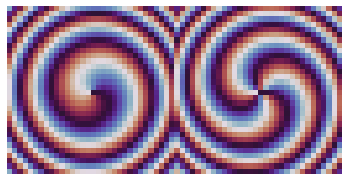

In [4]:
# Topological Charges
m1 = 1 ; m2 = 3

xmax = 10       # f-plane max
dim = 32        # Image Size
dx = 2*xmax/dim # f-plane pixel size

# Get cylindrical coord
x = np.linspace(-xmax,xmax-dx,dim)
X,Y=np.meshgrid(x,x)
R2=(X**2+Y**2)
T = np.arctan2(Y,X)

# Lens Parameters
flambda=80
Lens = np.exp(-1j*R2/(flambda/10))

# Vortex phase modulation
V1 = np.exp(1j*(m1)*T) 
V2 = np.exp(1j*(m2)*T)
LG1=Lens*V1 ; LG2=Lens*V2

# Plot phase to make sure it's the right shape
plt.imshow(np.angle(np.hstack((LG1,LG2))),cmap='twilight')
plt.axis('off')
plt.show()

# This function takes a numpy array of size [num_images, dim, dim]
# and applies a vortex phase, an fft, and an absolute value to each image
def vort_THIS(A,LGA,LGB):
    length=A.shape[0]
    out=np.zeros((length,A.shape[1],A.shape[2]*2))
    for i in range(length):
        A1=np.abs(myfft2(np.exp(1j*A[i]*np.pi/2)*LGA)) ; A2=np.abs(myfft2(np.exp(1j*A[i]*np.pi/2)*LGB))
        # Our single layer NN requires domain restriction within [-1,1]
        A1=(A1-np.amin(A1))/np.amax(A1-np.amin(A1))*2-1    ; A2=(A2-np.amin(A2))/np.amax(A2-np.amin(A2))*2-1
        out[i]=np.hstack((A1,A2))
    return out

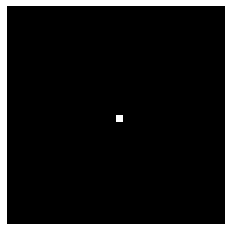

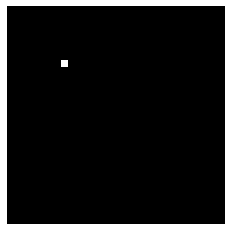

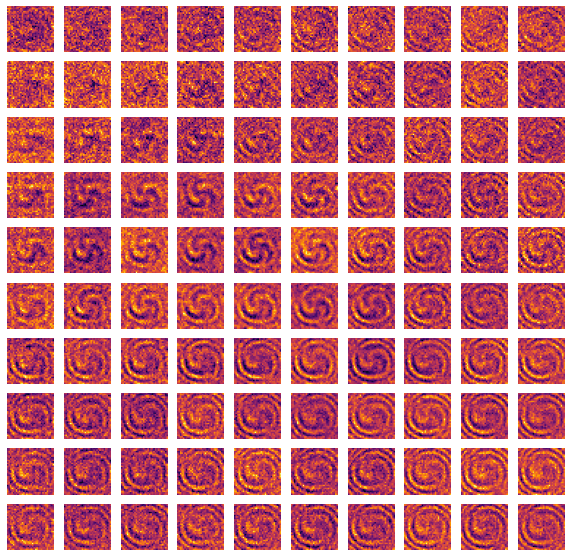

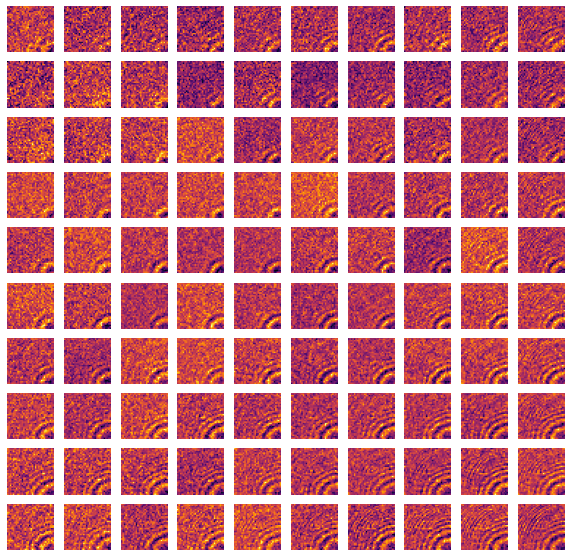

In [5]:
# create a single hot pixel in 2 locations. 
# if

C=np.zeros((32,32)) # C for 'center'
O=np.zeros((32,32)) # O for 'outer'
C[32//2,32//2]=1
O[32//4,32//4]=1

# Plot them for reference image in figure
plt.imshow(C,cmap='bone')
plt.axis('off')
plt.show()
plt.imshow(O,cmap='bone')
plt.axis('off')
plt.show()

# There's 2 masks used. 
C=np.hstack((C,C))
O=np.hstack((O,O))

# tensorflow will yell at you for this. 
# best practice would be to predict at a bunch of SPR's at once.
f,a=plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
        temp=models[i][j].predict(C.reshape(1,2*32**2))
        temp=(temp-np.amin(temp))/np.amax(temp-np.amin(temp))
        a[i,j].imshow(temp.reshape(32,32),cmap='inferno')
        a[i,j].axis('off')
plt.show()
f,a=plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
        temp=models[i][j].predict(O.reshape(1,2*32**2))
        temp=(temp-np.amin(temp))/np.amax(temp-np.amin(temp))
        a[i,j].imshow(temp.reshape(32,32),cmap='inferno')
        a[i,j].axis('off')
plt.show()